# Linear Regression

## Basic Error Metrics

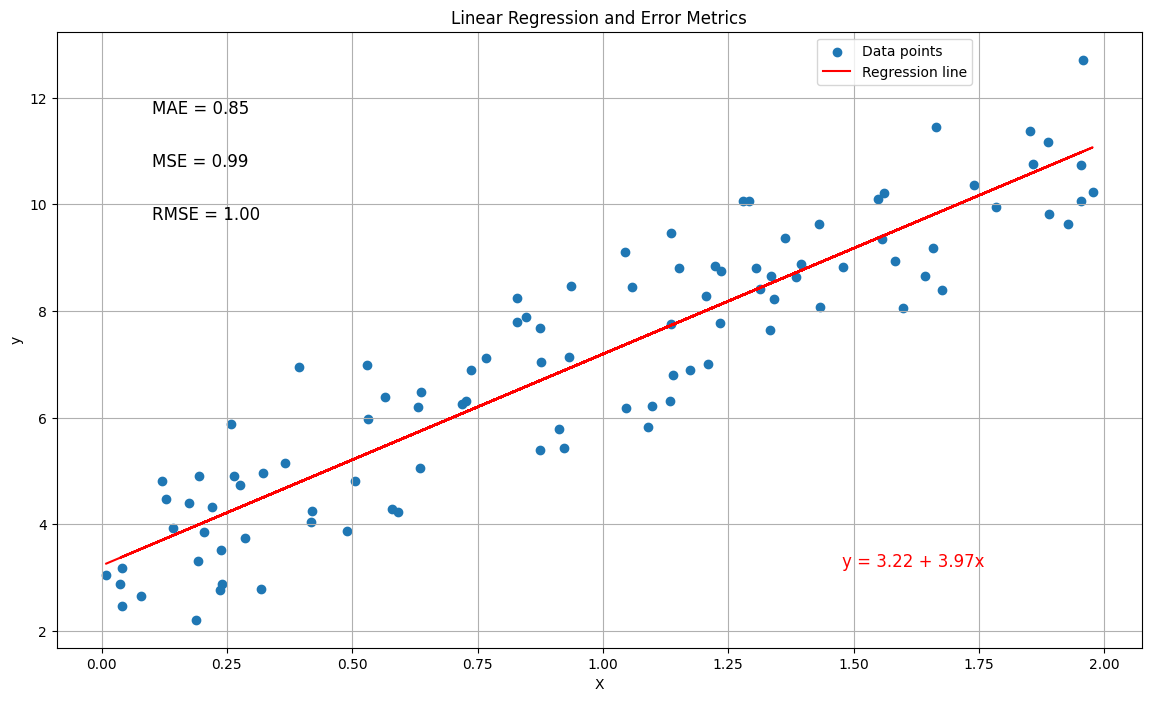

('y = 3.22 + 3.97x', 0.849258198323929, 0.9924386487246483, 0.9962121504602562)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 + 4 * X + np.random.randn(100, 1)

# Perform linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Calculate the regression equation
slope = lin_reg.coef_[0][0]
intercept = lin_reg.intercept_[0]
regression_eq = f"y = {intercept:.2f} + {slope:.2f}x"

# Calculate MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = sqrt(mse)

# Create the plot
plt.figure(figsize=(14, 8))
plt.scatter(X, y, label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')

# Annotate MAE, MSE, RMSE
plt.annotate(f"MAE = {mae:.2f}", xy=(0.1, y.max() - 1), fontsize=12)
plt.annotate(f"MSE = {mse:.2f}", xy=(0.1, y.max() - 2), fontsize=12)
plt.annotate(f"RMSE = {rmse:.2f}", xy=(0.1, y.max() - 3), fontsize=12)

# Annotate the regression equation
plt.annotate(regression_eq, xy=(X.max() - 0.5, y.min() + 1), fontsize=12, color='red')

plt.title('Linear Regression and Error Metrics')
plt.legend(bbox_to_anchor=(.85, 1))
plt.grid(True)
plt.show()

regression_eq, mae, mse, rmse

## R^2 and Adjusted R^2

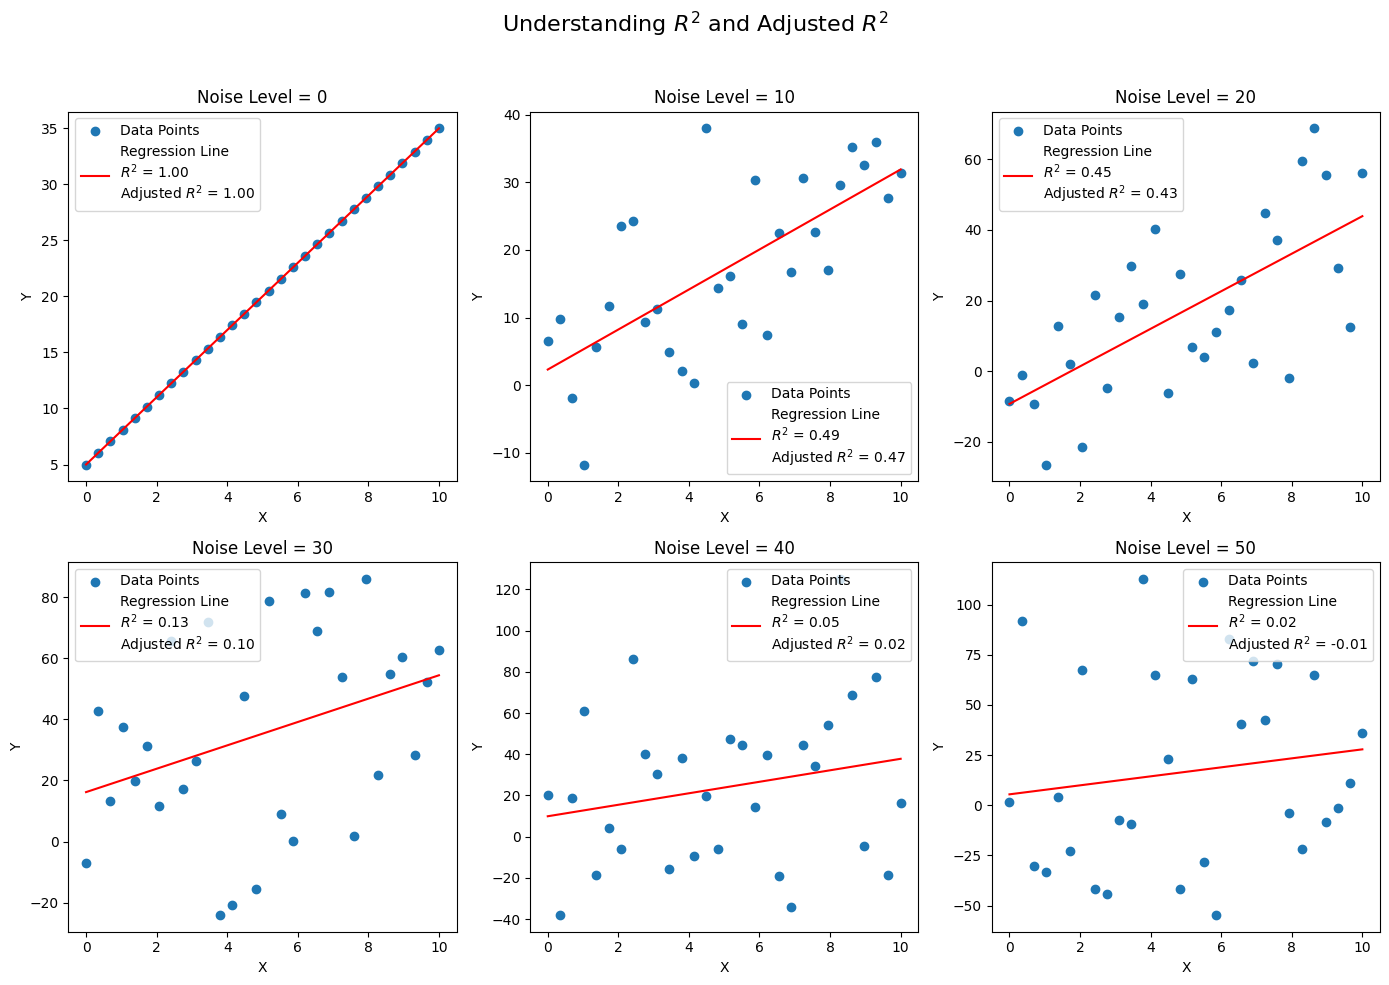

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Function to calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Data generation
np.random.seed(0)
x = np.linspace(0, 10, 30)
y_perfect = 3 * x + 5

# Noise levels
noise_levels = [0, 10, 20, 30, 40, 50]

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 10))
fig.suptitle("Understanding $R^2$ and Adjusted $R^2$", fontsize=16)

# Loop through subplots to create different noise levels
for i, noise_level in enumerate(noise_levels):
    row = i // 3
    col = i % 3
    y = y_perfect + np.random.normal(0, noise_level, len(x))

    # Linear Regression
    x_reshaped = x.reshape(-1, 1)
    reg = LinearRegression().fit(x_reshaped, y)
    y_pred = reg.predict(x_reshaped)

    # Metrics
    r2 = r2_score(y, y_pred)
    adj_r2 = adjusted_r2(r2, len(y), 1)

    # Plotting
    axs[row,col].scatter(x, y, label='Data Points')
    axs[row,col].plot(x, y_pred, color='r', label=f"Regression Line\n$R^2$ = {r2:.2f}\nAdjusted $R^2$ = {adj_r2:.2f}")
    axs[row,col].set_title(f"Noise Level = {noise_level}")
    axs[row,col].set_xlabel("X")
    axs[row,col].set_ylabel("Y")
    axs[row,col].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## AIC, BIC, and R^2

In [ ]:
# Only run this if you need to install statsmodels
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 60.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 10.9 MB/s eta 0:00:00


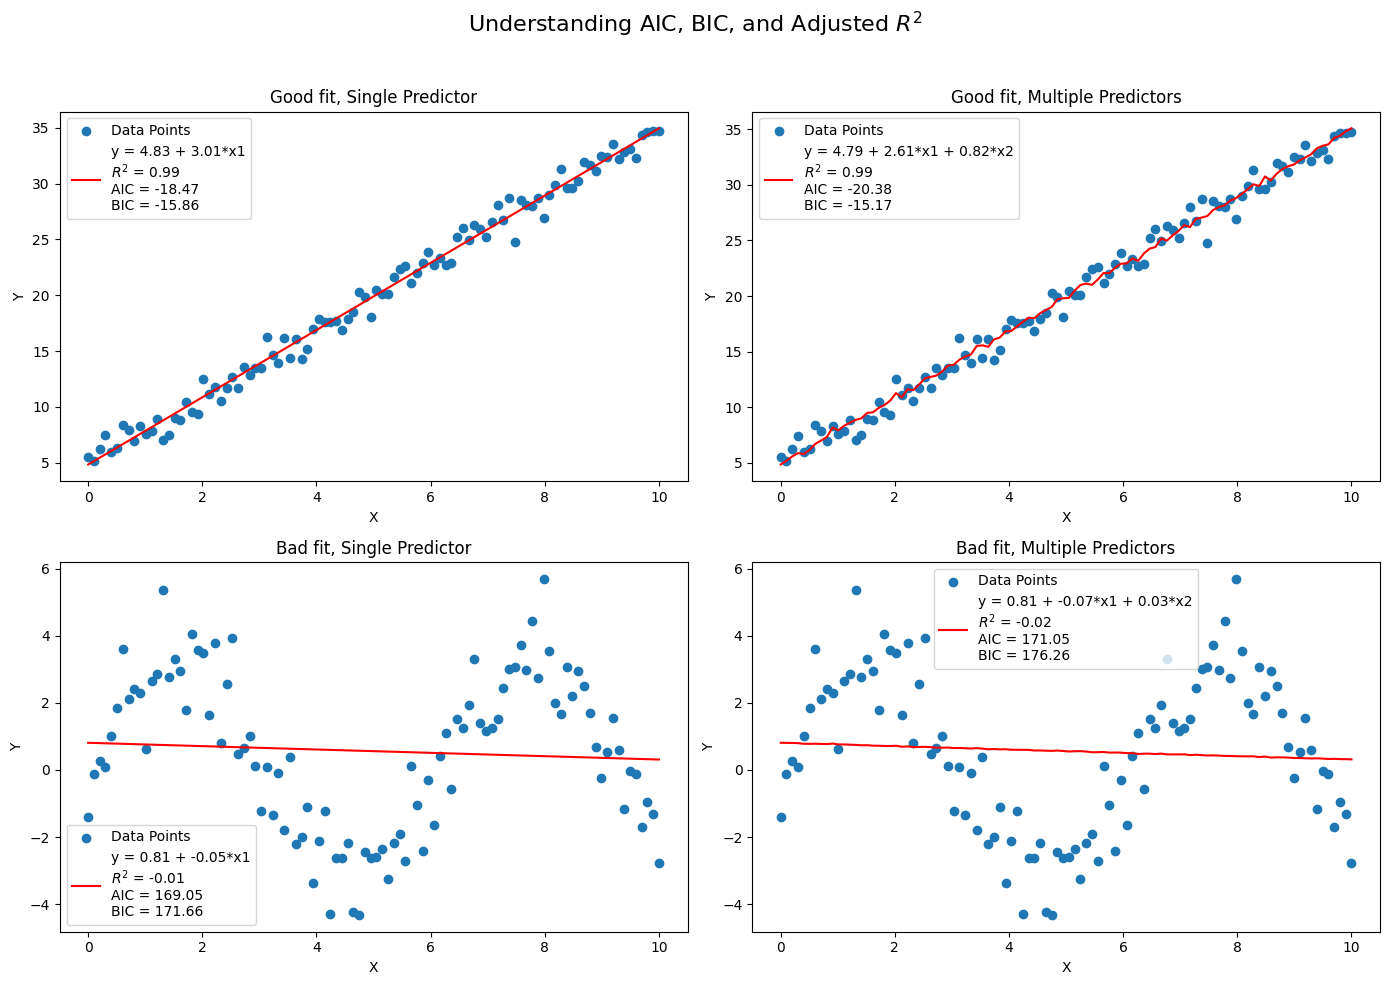

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Data generation
np.random.seed(42)
x = np.linspace(0, 10, 100)
y_good_fit = 3 * x + 5 + np.random.normal(0, 1, len(x))
y_bad_fit = 3 * np.sin(x) + np.random.normal(0, 1, len(x))

# Extra feature for multiple predictor scenario
x_extra = 0.5 * x + 0.2 * np.random.normal(0, 1, len(x))

# Function to calculate AIC and BIC
def calc_aic_bic(y, y_pred, p):
    resid = y - y_pred
    sse = sum(resid**2)
    n = len(y)
    aic = n * np.log(sse/n) + 2*p
    bic = n * np.log(sse/n) + np.log(n)*p
    return aic, bic

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Understanding AIC, BIC, and Adjusted $R^2$", fontsize=16)

# Scenarios: ["Good fit, Single Predictor", "Good fit, Multiple Predictors", "Bad fit, Single Predictor", "Bad fit, Multiple Predictors"]
scenarios = [(y_good_fit, x.reshape(-1, 1), 'Good fit, Single Predictor'),
             (y_good_fit, np.column_stack((x, x_extra)), 'Good fit, Multiple Predictors'),
             (y_bad_fit, x.reshape(-1, 1), 'Bad fit, Single Predictor'),
             (y_bad_fit, np.column_stack((x, x_extra)), 'Bad fit, Multiple Predictors')]

# Loop through subplots to create different scenarios
for i, (y, X, title) in enumerate(scenarios):
    ax = axs.flatten()[i]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    y_pred = model.predict(sm.add_constant(X))

    # Coefficients for the regression formula
    coeffs = model.params
    formula = f"y = {coeffs[0]:.2f}"
    for j in range(1, len(coeffs)):
        formula += f" + {coeffs[j]:.2f}*x{j}"

    # Calculate R-squared, AIC, BIC
    r2 = model.rsquared_adj
    aic, bic = calc_aic_bic(y, y_pred, model.df_model)

    # Plotting
    ax.scatter(x, y, label='Data Points')
    ax.plot(x, y_pred, color='r', label=f"{formula}\n$R^2$ = {r2:.2f}\nAIC = {aic:.2f}\nBIC = {bic:.2f}")

    #ax.plot(x, y_pred, color='r', label=f"Regression Line\n$R^2$ = {r2:.2f}\nAIC = {aic:.2f}\nBIC = {bic:.2f}")
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Examining Significance

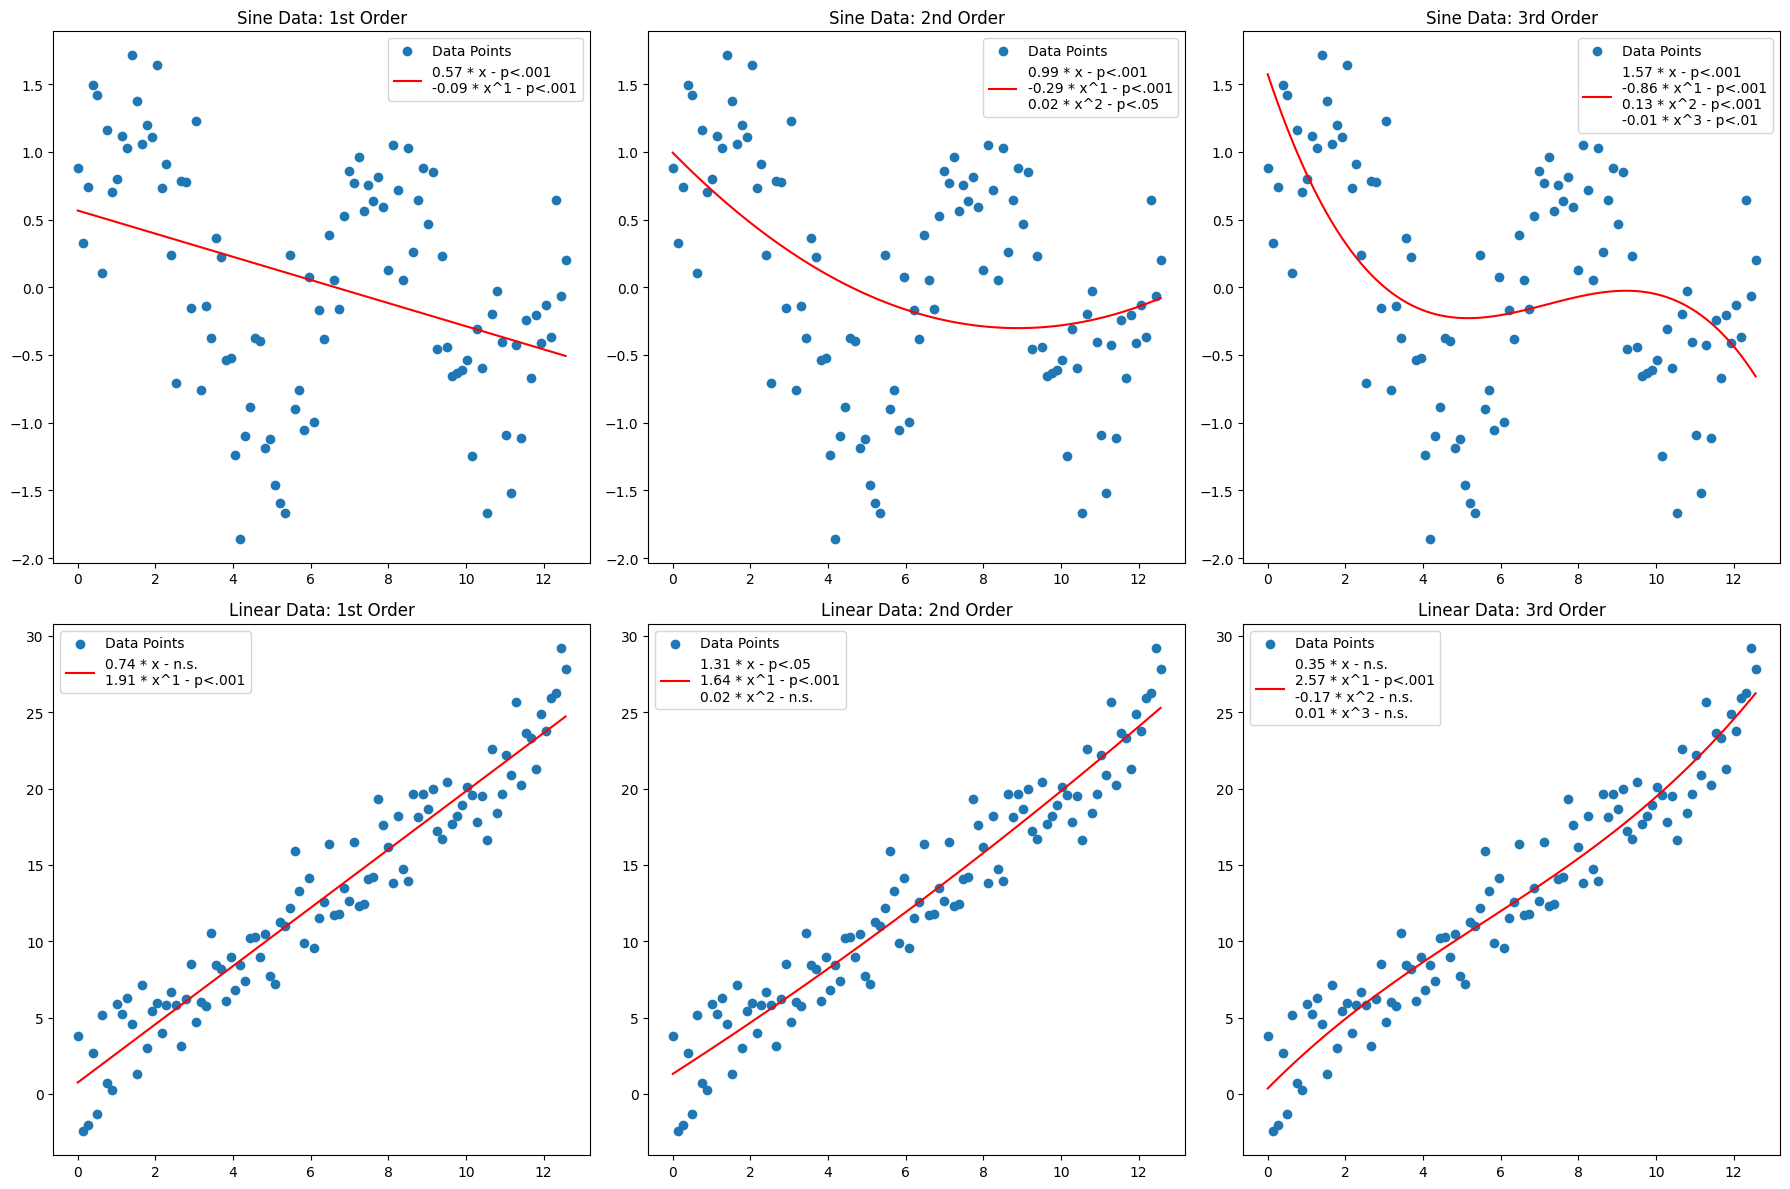

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Function to fit polynomial and return p-values
def fit_and_get_coeffs(x, y, degree):
    x_poly = np.column_stack([x**i for i in range(degree + 1)])
    model = sm.OLS(y, x_poly).fit()
    return model.params, model.pvalues
    print(model.params)
    return model.pvalues[-1]

def format_legend_text(coefficients, p_values):
    formatted_text = []
    for i, (coef, p_value) in enumerate(zip(coefficients, p_values)):
        # Convert p-value to conventional scientific notation
        if p_value >= 0.05:
            p_text = "n.s."
        elif p_value < 0.05 and p_value >= 0.01:
            p_text = "p<.05"
        elif p_value < 0.01 and p_value >= 0.001:
            p_text = "p<.01"
        else:
            p_text = "p<.001"

        # Format coefficient and power of x
        coef_text = f"{coef:.2f} * x"
        if i > 0:
            coef_text += f"^{i}"

        # Combine to create legend text
        formatted_text.append(f"{coef_text} - {p_text}")

    return formatted_text

# Seed for reproducibility
np.random.seed(0)

# Data generation parameters
n_points = 100
x = np.linspace(0, 4 * np.pi, n_points)

# Generate data using sine function
y_sine = np.sin(x) + np.random.normal(0, 0.5, n_points)

# Generate data using a linear function
y_linear = 2 * x + np.random.normal(0, 2, n_points)

# Create plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Titles
titles = ['1st Order', '2nd Order', '3rd Order']

# Loop through to create polynomial fits
for i in range(3):
    # Fit polynomial for sine data
    p_sine = np.polyfit(x, y_sine, i + 1)
    y_sine_fit = np.polyval(p_sine, x)
    coeffs, pvalues = fit_and_get_coeffs(x, y_sine, i + 1)
    p_value_sine = "\n".join(format_legend_text(coeffs,pvalues))

    # Fit polynomial for linear data
    p_linear = np.polyfit(x, y_linear, i + 1)
    y_linear_fit = np.polyval(p_linear, x)
    coeffs, pvalues = fit_and_get_coeffs(x, y_linear, i + 1)
    p_value_linear = "\n".join(format_legend_text(coeffs,pvalues))

    # Plotting for sine data
    axs[0, i].scatter(x, y_sine, label='Data Points')
    axs[0, i].plot(x, y_sine_fit, 'r', label=f'{p_value_sine}')
    axs[0, i].set_title(f'Sine Data: {titles[i]}')
    axs[0, i].legend()

    # Plotting for linear data
    axs[1, i].scatter(x, y_linear, label='Data Points')
    axs[1, i].plot(x, y_linear_fit, 'r', label=f'{p_value_linear}')
    axs[1, i].set_title(f'Linear Data: {titles[i]}')
    axs[1, i].legend()

plt.tight_layout()
plt.show()

## Student's T-distribution

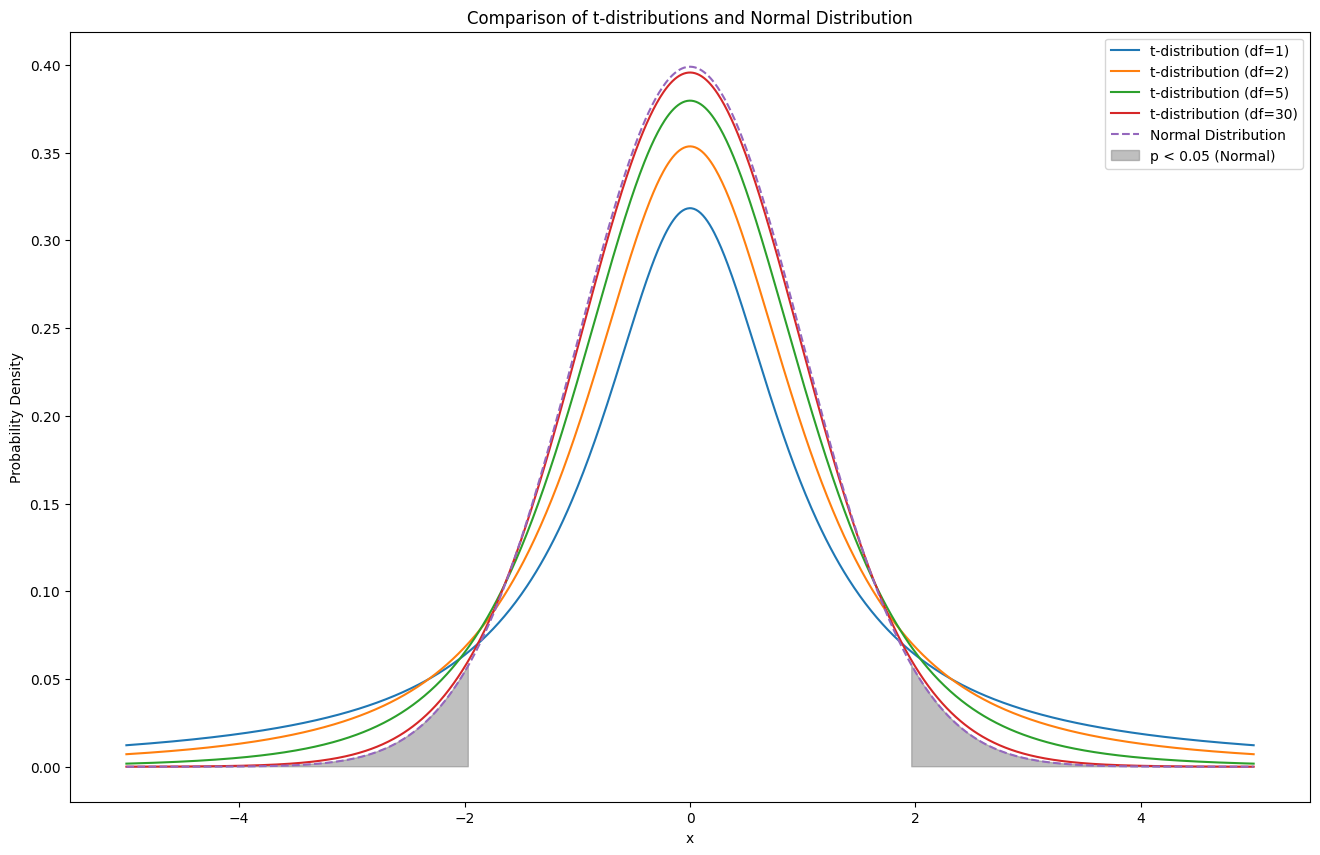

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm

# Generate data points
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(16, 10))
# Generate t-distributions for different degrees of freedom
for df in [1, 2, 5, 30]:
    y_t = t.pdf(x, df=df)
    plt.plot(x, y_t, label=f't-distribution (df={df})')

# Generate normal distribution
y_norm = norm.pdf(x, 0, 1)

plt.plot(x, y_norm, label='Normal Distribution', linestyle='--')

# Mark the tails for p < 0.05 in the normal distribution
critical_value_05 = norm.ppf(1 - 0.025)
plt.fill_between(x, y_norm, where=(x <= -critical_value_05) | (x >= critical_value_05), color='gray', alpha=0.5, label='p < 0.05 (Normal)')

# Labels and title
plt.title('Comparison of t-distributions and Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()

plt.show()